In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import deepjets.models as djm
import deepjets.learning as djl
from keras.optimizers import Adam

Using Theano backend.


In [3]:
n_images = 1000
n_folds = 2
test_frac = 0.1
val_frac = 0.1
sig_file = 'images/w_shrink_1p2.h5'
bkd_file = 'images/qcd_shrink_1p2.h5'
dataset_name = 'datasets/shrink_1p2'
model_name = 'models/maxout_shrink_1p2'

In [4]:
h5_files = djl.prepare_datasets(
    sig_file, bkd_file, dataset_name,
    n_sig=n_images, n_bkd=n_images, test_frac=test_frac, val_frac=val_frac,
    n_folds=n_folds, shuffle=True, shuffle_seed=1)

In [5]:
gs_results = djl.optimizer_grid_search(
    djm.get_maxout, (25**2,), Adam, {'lr' : [0.001, 0.002]},
    h5_files['train'], model_name=model_name, verbose=2, max_jobs=1, log_to_file=False)

Compiling models...

Cross-validating models...

Optimizer parameters = {'lr': 0.001}, k-fold = 0
Training on 810 samples, validating on 90 samples.
Datasets from datasets/shrink_1p2_train_kf0.h5.
Epoch 48/100: epochs w/o increase = 10, AUC = 5.45644149133                    
Patience tolerance reached.
Training complete. Best AUC = 9.71446105574
Testing on 900 samples.
Dataset from datasets/shrink_1p2_train_kf0.h5.
Score    = 0.577557733059
AUC      = 7.211169984
Accuracy = 655/900 = 0.727777777778

Optimizer parameters = {'lr': 0.001}, k-fold = 1
Training on 810 samples, validating on 90 samples.
Datasets from datasets/shrink_1p2_train_kf1.h5.
Epoch 19/100: epochs w/o increase = 10, AUC = 7.02329372755                    
Patience tolerance reached.
Training complete. Best AUC = 8.08039242082
Testing on 900 samples.
Dataset from datasets/shrink_1p2_train_kf1.h5.
Score    = 0.638107902606
AUC      = 9.58608156993
Accuracy = 612/900 = 0.68

Optimizer parameters = {'lr': 0.002}, k-fold 

Testing on 200 samples.
Dataset from datasets/shrink_1p2_test.h5.
Score    = 0.525675318241
AUC      = 10.9610912002
Accuracy = 150/200 = 0.75



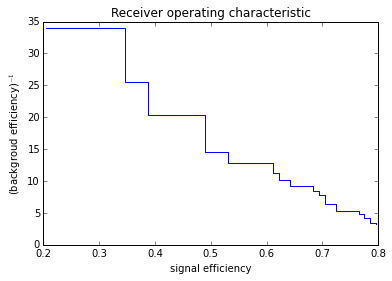

In [6]:
_ = djl.test_model(djm.load_model('models/maxout_shrink_1p2_gp1_kf0'), h5_files['test'])

In [7]:
print djl.select_best_model(gs_results)

{'AUC': 9.3347579064794211, 'parameters': {'lr': 0.002}}
